# Experiment on optical filters using Fourier Optics
## ->Determination of digital optical filtered images

### Loading libraries

In [2]:
from scipy import ndimage, misc
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
import math
import sys

### Loading experimental original and filtered images

In [3]:
rgb_weights = [0.2989, 0.5870, 0.1140]

#load images and convert them to the gray scale
imgs_open = []
imgs_open.append(np.dot(iio.imread('./images/open.bmp'), rgb_weights))

imgs_PA_ponto = []
imgs_PA_ponto.append(np.dot(iio.imread('./images/alto.bmp'), rgb_weights))

imgs_PB_1 = []
imgs_PB_1.append(np.dot(iio.imread('./images/close_1mm.bmp'), rgb_weights))


imgs_cartao = []
imgs_cartao.append(np.dot(iio.imread('./images/cartao.bmp'), rgb_weights))

imgs_PA_cartao = []
imgs_PA_cartao.append(np.dot(iio.imread('./images/alto_cartao.bmp'), rgb_weights))

imgs_PB_cartao_1 = []
imgs_PB_cartao_1.append(np.dot(iio.imread('./images/baixo_cartao_1mm.bmp'), rgb_weights))

imgs_PB_cartao_9 = []
imgs_PB_cartao_9.append(np.dot(iio.imread('./images/baixo_09mm_cartaoCarto.bmp'), rgb_weights))

### Functions for the digital filtering of the images

In [4]:
def center(img_pad, rows, columns):
    #receives:
    #. image - img_pad
    #. number of image's rows - rows
    #. number of image's columns - columns
    #returns:
    #. image with centered/decentered spectrum - img_pad
    
    for i in range(rows):
        for j in range(columns):
            img_pad[i,j] *= (-1)**(i+j)
    return img_pad

In [78]:
def filter_low_high(flag_low_high, img, img_exp, f_rad = 0.1):
    #receives:
    #. flag for low or high pass filter function (0 or 1 respectively) - flag_low_high
    #. original image - img
    #. experimentally filtered image - img_exp
    #. "cutoff frequency" (in arbitrary units) - f_rad
    
    #get dimensions
    rows, columns =  np.shape(img)[0], np.shape(img)[1]
       
    #fourier transform for original and experimentally filtered image
    FT = np.fft.fft2(center(img.copy(), rows, columns))
    FT_exp = np.fft.fft2(center(img_exp.copy(), rows, columns))
    
    #calculate radius of filter to be applied - given by the scale factor f_rad
    radius = int(f_rad*rows)
    
    #construct filter
    Filter = FT.copy()
    Filter[:] = 0 + flag_low_high*1
    for i in range(rows):
        for j in range(columns):
            if np.sqrt((rows//2-i)**2 + (columns//2-j)**2)<=radius:
                Filter[i, j] = 1*int(not(flag_low_high))
    
    #apply filter
    FFT_new = FT*Filter
    
    #obtain new image: inverse fourier
    img_new_ = (np.fft.ifft2(FFT_new)).real
    img_new = center(img_new_, rows, columns)    
    
    #plot side by side original, results and expectations
    _, axs = plt.subplots(3,2, figsize = [12,12], constrained_layout = True)
    axs[0,0].imshow(img, cmap = 'gray')
    axs[0,0].axis('off')
    axs[0,0].set_title('Original image')
    axs[0,1].imshow(np.log(abs(FT)+1), cmap = 'gray')
    axs[0,1].axis('off')
    axs[0,1].set_title('Original spectrum')
    axs[2,0].imshow(img_exp, cmap = 'gray')
    axs[2,0].axis('off')
    axs[2,0].set_title('Experimental filtered image')
    axs[2,1].imshow(np.log(abs(FT_exp)+1), cmap = 'gray')
    axs[2,1].axis('off')
    axs[2,1].set_title('Experimental filtered image spectrum')
    axs[1,0].imshow(img_new, cmap = 'gray')
    axs[1,0].axis('off')
    axs[1,0].set_title('Digitally filtered image')
    axs[1,1].imshow(np.log(abs(FFT_new)+1), cmap = 'gray')
    axs[1,1].axis('off')
    axs[1,1].set_title('Digitally filtered image spectrum')
    
    return 

### Low-pass filter

#### optical iris - pi number

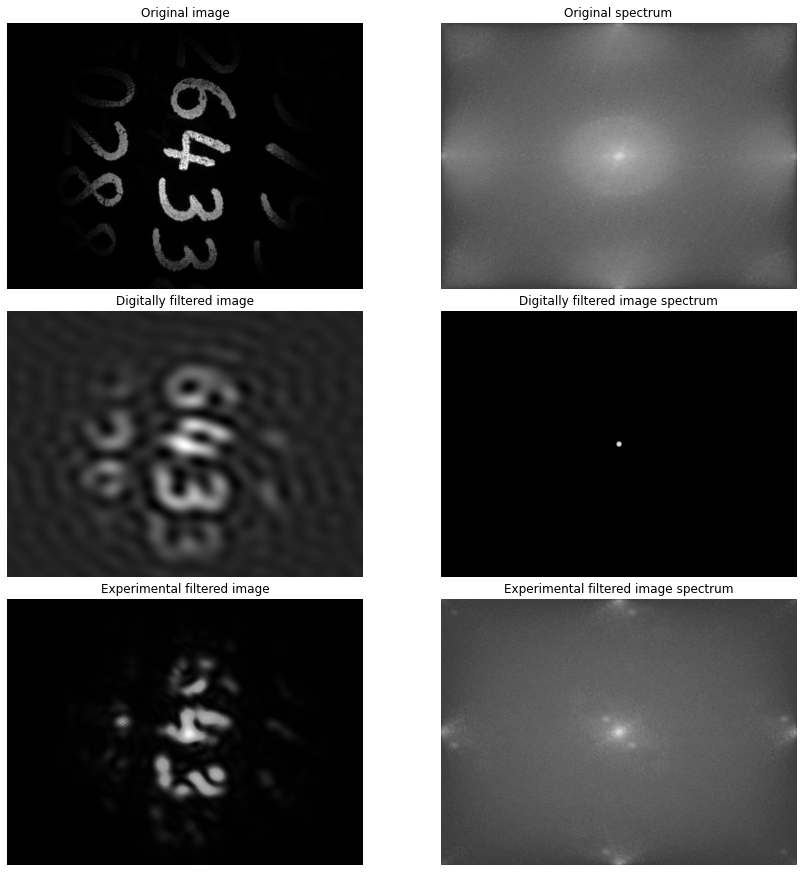

In [53]:
vmax = 0.01
filter_low_high(0, imgs_open[0], imgs_PB_1[0], f_rad = vmax)

#### poked cardboard - cardboard image

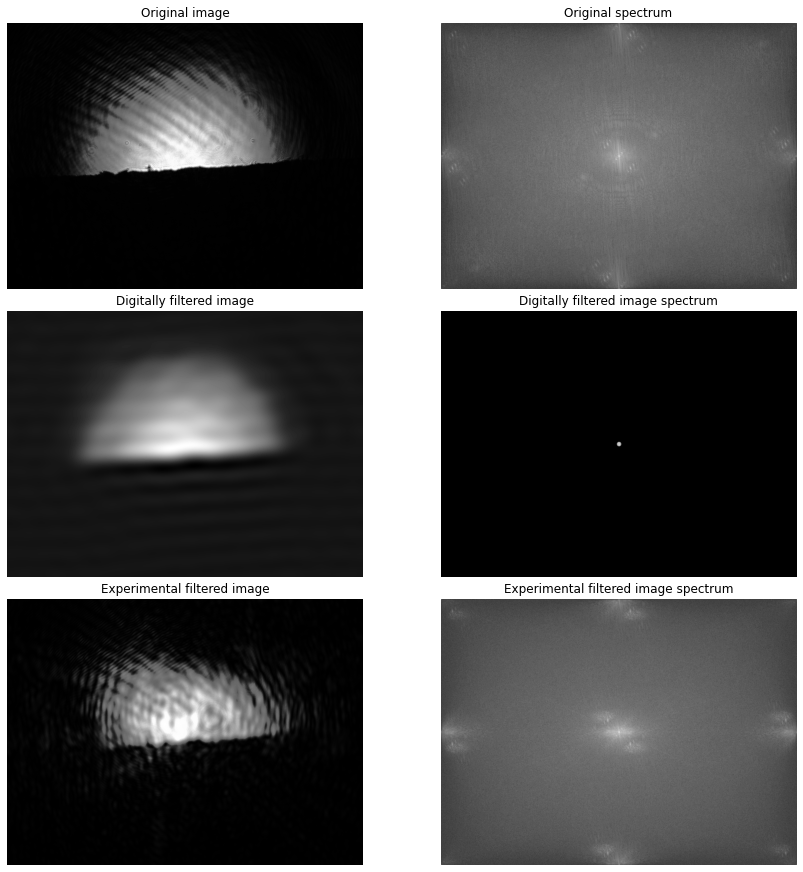

In [55]:
vmax = 0.009
filter_low_high(0, imgs_cartao[0], imgs_PB_cartao_9[0], f_rad = vmax)

### High-pass filter

#### spotted glass - pi number

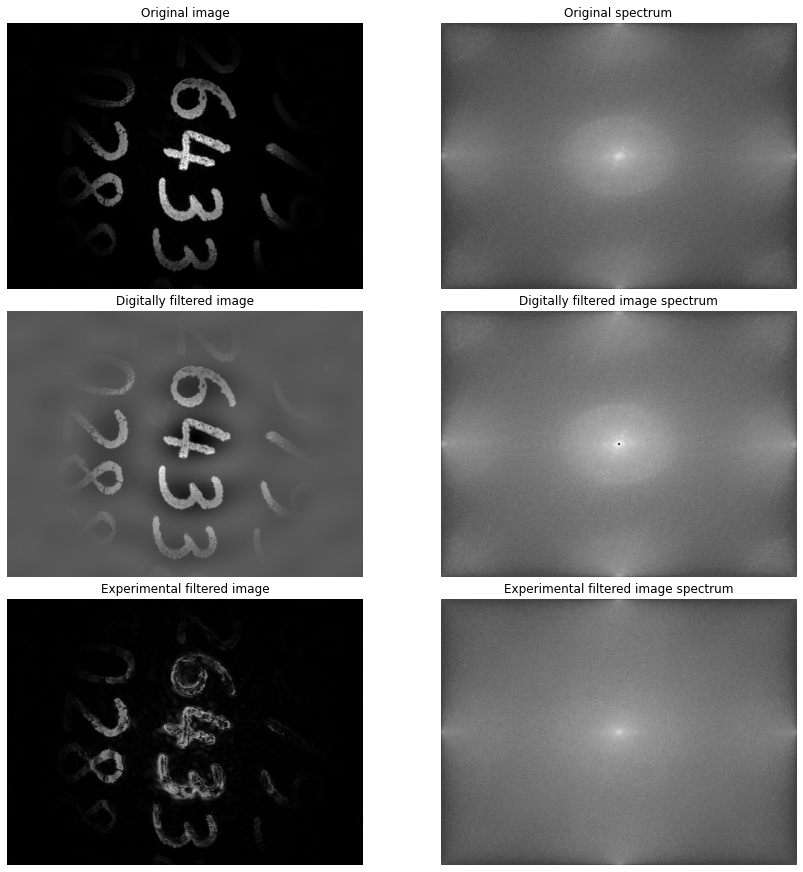

In [79]:
vmax = 0.004
filter_low_high(1, imgs_open[0], imgs_PA_ponto[0], f_rad = vmax)

#### spotted glass - cardboard image

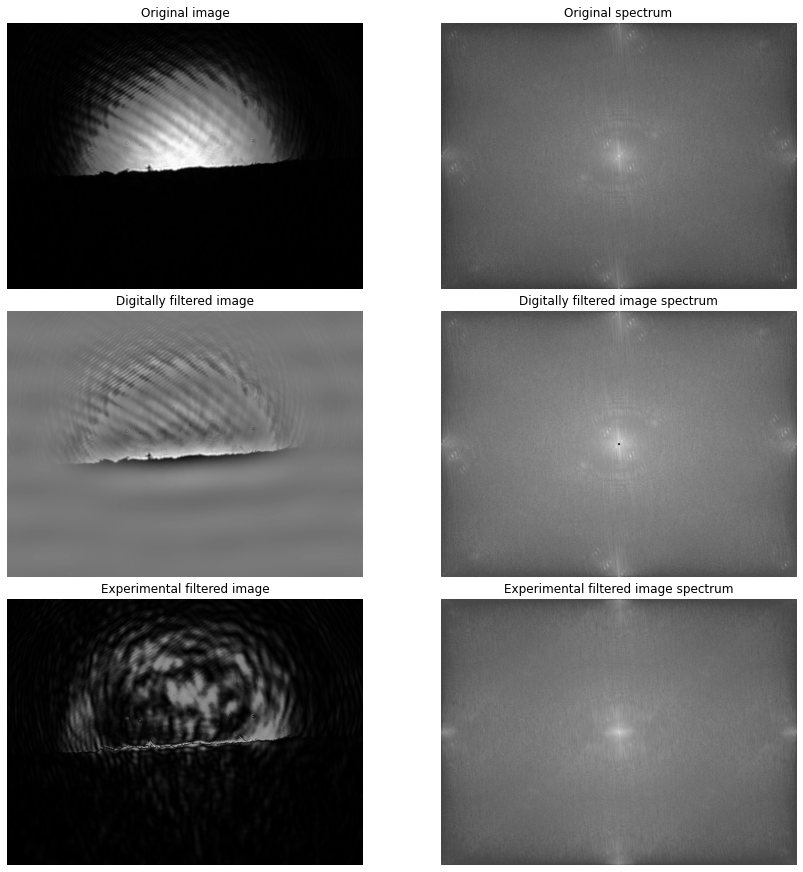

In [80]:
vmax = 0.004
filter_low_high(1, imgs_cartao[0], imgs_PA_cartao[0], f_rad = vmax)